In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2

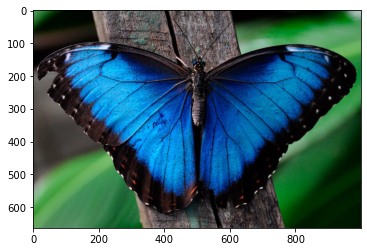

In [3]:
img = cv2.imread('../datasets/mariposa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convertir color [viene en cv]
plt.figure()
plt.imshow(img)
plt.show()

In [4]:
img.shape #nos dice que es un arreglo tridimensional

(664, 1000, 3)

(664, 1000)
[  0 255]


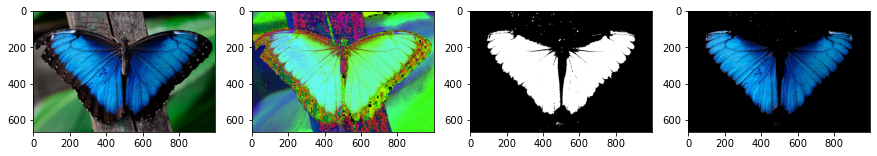

In [5]:
nrows, ncols, nch = img.shape #nch = canales (RGB)
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

lower = np.array([90,50,50]) #Hue, saturation, value [https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/HSV_color_solid_cylinder.png/1200px-HSV_color_solid_cylinder.png]
upper = np.array([130,255,255]) 
mask_range = cv2.inRange(hsv,lower,upper) #detectamos máscara (los que sí son azules los pone de blanco (sí cumplen))
img_mask = cv2.bitwise_and(img, img, mask=mask_range)

print(mask_range.shape)
print(np.unique(mask_range))

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(img)
plt.subplot(1,4,2)
plt.imshow(hsv) #espera rgb y recibe hsv, por eso se ve raro
plt.subplot(1,4,3)
plt.imshow(mask_range, cmap='gray') #mapa establecido en escala de grises
plt.subplot(1,4,4)
plt.imshow(img_mask) #muestra los que cumplen en mask_range a color
plt.show()


gray -> colors (664, 1000)
img -> img (664, 1000, 3)
gray -> colors (664, 1000)
img_gray ->shirtNew (664, 1000, 3)


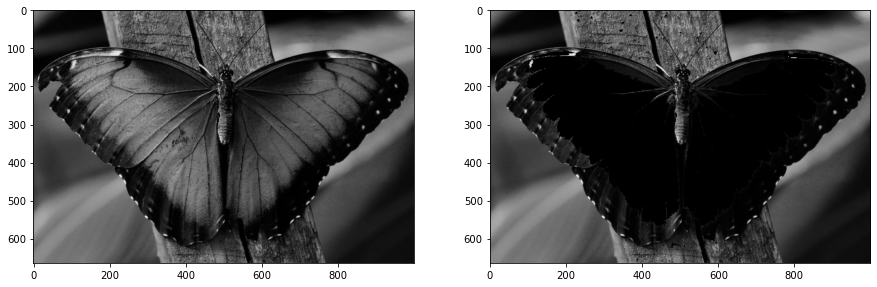

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = np.zeros_like(img)

#escala de grises de 1 canal a 3 canales
img_gray[:,:,0] = gray #mismos valores en la escala de grises
img_gray[:,:,1] = gray
img_gray[:,:,2] = gray

print('img -> img', img.shape)
print('gray -> colors', gray.shape) # sólo un canal 0=negro, 1=blanco
print('img_gray ->shirtNew', img_gray.shape) #img_gray[X,Y,¿R o G o B?]  ¡3 CANALES!
gray_mask = cv2.bitwise_and(img_gray,img_gray, mask= ~mask_range)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(gray_mask)
plt.show()

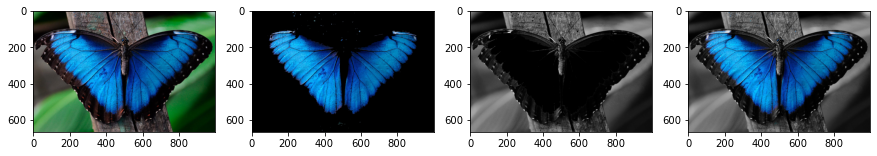

In [7]:
#SUMAR IMAGENES
img_final = img_mask + gray_mask

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(img)
plt.subplot(1,4,2)
plt.imshow(img_mask) #espera rgb y recibe hsv, por eso se ve raro
plt.subplot(1,4,3)
plt.imshow(gray_mask) #mapa establecido en escala de grises
plt.subplot(1,4,4)
plt.imshow(img_final) #muestra los que cumplen en mask_range a color
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

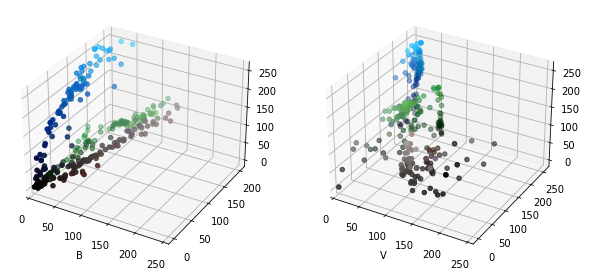

In [8]:
img = cv2.imread('../datasets/mariposa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convertir color [viene en ]
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 

nrows, ncols, nch = img.shape

Ximg = np.reshape(img,(nrows*ncols,3))
Xhsv = np.reshape(hsv,(nrows*ncols,3))

nsample = 300
idx = np.random.permutation(nrows*ncols)[:nsample] #toma los primeros 300 pixeles de forma random
Ximg = Ximg[idx,:]
Xhsv = Xhsv[idx,:]


fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1,projection='3d')
ax.scatter(Ximg[:,0], Ximg[:,1], Ximg[:,2], c=Ximg/255) #color por punto (c = Ximg/255)
ax.set_xlim(0,255)
ax.set_xlim(0,255)
ax.set_xlim(0,255)
ax.set_xlabel('R')
ax.set_xlabel('G')
ax.set_xlabel('B')
plt.show


ax = plt.subplot(1,2,2,projection='3d')
ax.scatter(Xhsv[:,0], Xhsv[:,1], Xhsv[:,2], c=Ximg/255) #color por punto (c = Ximg/255)
ax.set_xlim(0,180)
ax.set_xlim(0,255)
ax.set_xlim(0,255)
ax.set_xlabel('H')
ax.set_xlabel('S')
ax.set_xlabel('V')
plt.show

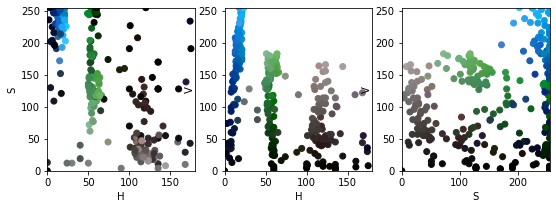

In [9]:
#combinar H->R, S->G, V->B
plt.figure(figsize = (9, 3))
plt.subplot(1, 3, 1)
plt.scatter(Xhsv[:, 0], Xhsv[:, 1], c = Ximg/255)
plt.xlim(0, 180)
plt.ylim(0, 255)
plt.xlabel('H')
plt.ylabel('S')

plt.subplot(1, 3, 2)
plt.scatter(Xhsv[:, 0], Xhsv[:, 2], c = Ximg/255)
plt.xlim(0, 180)
plt.ylim(0, 255)
plt.xlabel('H')
plt.ylabel('V')

plt.subplot(1, 3, 3)
plt.scatter(Xhsv[:, 1], Xhsv[:, 2], c = Ximg/255)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.xlabel('S')
plt.ylabel('V')
plt.show()

[61 37 35 73  3 16 45 19  5  6]


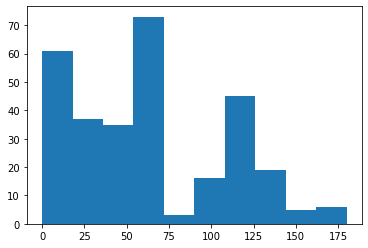

In [10]:
h = np.histogram(Xhsv[:,0], bins=10, range=[0,180])[0] #bins = #barritas
print(h)
plt.figure()
plt.hist(Xhsv[:,0], bins=10, range=[0,180])
plt.show()